In [9]:
import polars as pl
import turbofats
from tqdm import tqdm
import os
from scripts.utils import read_light_curves
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy

In [10]:
with open("dataset/4clasess.pkl","rb") as f: ##se carga el dataset con mas de 20 observaciones,sin nans,-inf,inf 
    data = pkl.load(f)

In [11]:
data

[{'mjd': [0.0,
   20.008899999993446,
   34.79629999999452,
   45.86659999999392,
   57.73549999999523,
   61.75499999999738,
   67.87829999999667,
   77.68059999999969,
   81.79419999999664,
   91.80749999999534,
   100.80739999999787,
   120.72789999999804,
   132.69609999999375,
   383.9962999999989,
   385.99669999999605,
   410.9597999999969,
   411.94659999999567,
   436.8515999999945,
   476.72379999999976,
   708.997199999998,
   716.9503999999943,
   723.9126999999935,
   723.9162999999971,
   728.9015999999974,
   734.9972999999954,
   742.9798999999985,
   766.852899999998,
   777.9977999999974,
   783.7746999999945,
   795.7070999999996,
   804.9042999999947,
   806.7983999999997,
   812.7792999999947,
   816.7862999999998,
   816.7866999999969,
   826.6754000000001,
   841.7417999999961,
   854.7392999999938,
   857.6584999999977,
   857.6588999999949,
   859.7263999999996],
  'flux': [-0.6319728542685769,
   -1.3840929576525334,
   -0.7653291564620203,
   0.29721717610843

In [8]:
feature_list = ["PeriodLS_v2", 
    "Amplitude",               
    "StetsonK",
    "Mean",                 
    "Gskew",             
    "Psi_CS_v2"                
]
fs = turbofats.FeatureSpace(feature_list=feature_list)

all_features = []

for i, lc in tqdm(enumerate(data), total=len(data)):
    df = pd.DataFrame({
        "time": lc['mjd'],
        "magnitude": lc['flux'],
        "error": lc['err']
    })
    df['id'] = i
    df.set_index('id', inplace=True)

    try:
        features = fs.calculate_features(lightcurve=df)
        features['id'] = i
        all_features.append(features)
    except Exception as e:
        print(f"Error en curva {i}: {e}")
final_df = pd.concat(all_features, ignore_index=True)

final_df.to_csv("data.csv")

  2%|▏         | 4261/201827 [03:40<2:50:41, 19.29it/s]


KeyboardInterrupt: 

preguntar que utiliza el profe para dejar corriendo programas  (SCREEN byobu)
en turbofats no hay features problemáticos, solo features que arrojan warnings de división por cero

In [25]:
map_num2class = {
    0:'RRL',
    1:'Cepheid',
    2:'EB',
    3:'CLAGN'
}

In [38]:
for i,clase in enumerate(data):
    if clase['class'] == 0:
        print(i)
        break

164424


In [56]:
fs = turbofats.FeatureSpace(feature_list=["PeriodLS_v2"])
df = pd.DataFrame({
        "time": time,
        "magnitude": mag,
        "error": err
    })
df['id']=0
df.set_index('id', inplace=True)
fs.calculate_features(lightcurve=df)

,PeriodLS_v2
oid,
0,0.961295


1.040200 0.982741
0.520100 0.950572
1.560400 0.845482
0.851700 0.743677
3.120800 0.742149
1.728300 0.724224
1.730600 0.699882
2.439400 0.675285
20.390300 0.667291
3.309600 0.644237
1.0402000000000005
0.9613535858488748


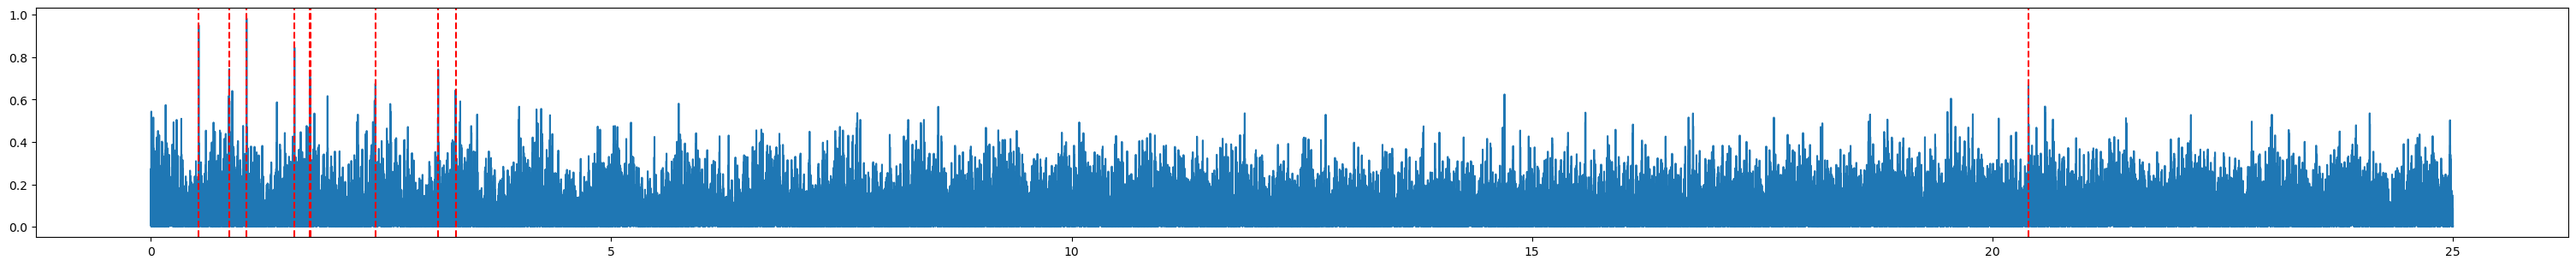

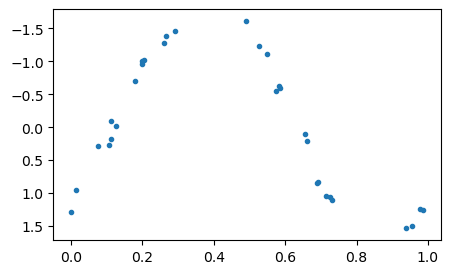

In [57]:
from astropy.timeseries import LombScargle
import numpy as np
idx = 150001
time = np.array(data[idx]['mjd'])*1000
mag = data[idx]['flux']
err = data[idx]['err']
freq = np.arange(1e-3, 25, 1e-4)
power = LombScargle(time, mag, err).power(freq)

fig, ax = plt.subplots(figsize=(30,3), constrained_layout=True)
ax.plot(freq, power)
local_max = np.where((power[1:-1] > power[:-2]) & (power[1:-1] > power[2:]))[0]+1
top_freqs = np.argsort(power[local_max])[::-1]
for top_freq in top_freqs[:10]:
    print(f'{freq[local_max][top_freq]:0.6f} {power[local_max][top_freq]:0.6f}')
    ax.axvline(freq[local_max][top_freq], c='r', ls='--')
print(freq[np.argmax(power)])
p_best = 1/freq[np.argmax(power)]
print(p_best)
fig, ax = plt.subplots(figsize=(5,3))
ax.errorbar(np.mod(time,p_best)/p_best, mag, err, fmt='.')
ax.invert_yaxis() 

31
0.18138944275787458


Text(0.5, 1.0, 'Cepheid')

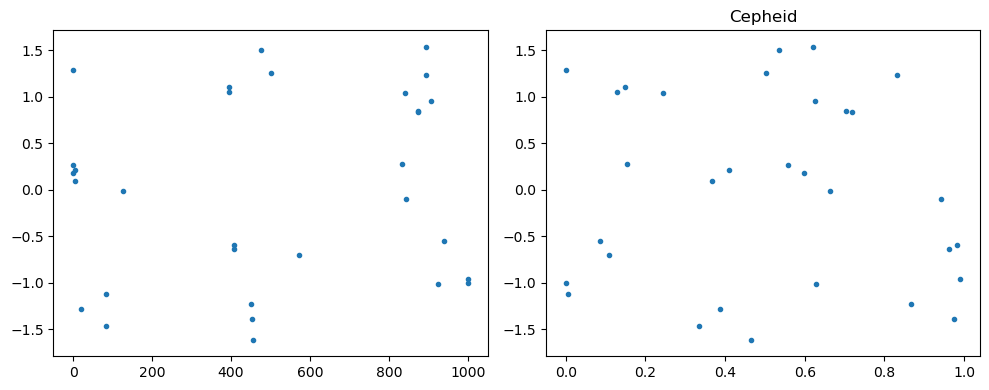

In [53]:
idx = 150001
mjd = np.array(data[idx]['mjd'])*1000
flux = data[idx]['flux']
err = data[idx]['err']
print(len(mjd))
fig,ax = plt.subplots(1,2,tight_layout=True,figsize=(10,4))
ax[0].errorbar(mjd,flux,err,fmt=".")
period = final_df.iloc[idx]["PeriodLS_v2"]
print(period)
phase = np.mod(mjd,period)/period
ax[1].errorbar(phase,flux,err,fmt=".")
ax[1].set_title(map_num2class[data[idx]["class"]])

Inspección de periodos muy malos. Los features enteros seran muy malos? D:
